---

## Project Instruction

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service), for instance you could store your work on GitLab. You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- Make sure your code is readable, organised, and commented appropriately.


## Team working 

Firstly agree amongst yourself how you are to work together as a group. 
- When will you meet? or will you work remotely from each other?
- How are you going to share code?
- How will you divide tasks?
- Who will present the final notebook, who will upload?
- When are you planning to work on the project?

The following tasks are all open-ended, so you should plan to work on them and investigate the problems raised and think about what you wish to cover. Because the task is open-ended you don't need to talk about every aspect of the problem to get a good mark - you should aim to present a coherent and well coded investigation into some aspects of each task though. The listed questions are a guide to some things you could think about to get you started, you don't need to answer them all, and you can certainly answer questions that are not listed.

When you are presenting your investigation of each problem, be sure to make a coherent discussion for each task (using markdown, maths as appropriate and code cells). In particular, since you are working as a group some work will be needed to make a single written response to the task combining all of the code and writing that you each contribute - this is something that you should plan to do and the quality of presentation will be marked.

## Task 1 - Analysing the product reviews

In this project, you are supposed to analyse product reviews and extract helpful information from them. The case we are studying here is the review dataset of women’s clothes that are sold by a company online. In the file `WomensApparelReviews.csv`, you are given over 23000 reviews that are real but anonymized. The columns of this dataset are the following variables:


**Product ID**: integer variable that refers to the specific item that is reviewed.

**Age**: the reviewers age.

**Title**: the title picked by the reviewer (some reviewers didn't pick any titles).

**Review Text**: the body text of the review.

**Rating**: the product score given by the customer from 1 (worst), to 5 (best).

**Is it Recommended?**: the customers are asked whether or not they recommend the product. 1 means the product is recommended, 0 means not recommended.

**Department**: the products are classified in different departments such as dress, top and ...

A major part of this task is analysing the review text and deciding how positive or negative it is. To that end, there are two more data files: `positive-words.txt` and `negative-words.txt`, which contain lists of positive and negative words, respectively. These words come from the paper by *Minqing Hu and Bing Liu. "Mining and summarizing customer reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, Seattle, Washington, USA, Aug 22-25, 2004*. You will need to invent a metric for how positive or negative "Review Text" is, based on how many of the words in it are in the positive/negative word lists. For instance, is a review containing one positive and one negative word: overall positive, negative or neutral? - try and develop a single measure based on the word occurrences that will describe the positivity/negativity of the review. You can also decide if a "Title" is positive, negative or neutral by searching for them in the lists of positive and negative words. Once you have developed one positivity/negativity measure can you think of other measures that you could compare?

This project is open-ended, so you can come up with your own ideas to analyse the dataset and extract useful information or interesting facts. However at least one of the ideas you present should make use of the positive and negative word lists for analysing the reviews text. Here are some questions you might address in your analysis (of course you are not limited to just these questions):

- What is the age distribution of customers?
- What is the most popular item in each age group? (you can classify the ages however you think appropriate - be sure to justify what you do).
- Using the measure of negativity or positivity that you define, rate the reviews. You can also decide whether a title is positive or negative. Are the negativity-positivity of the titles and that of the review texts correlated? 
- What is the average rating in positive, negative or neutral reviews?
- Is the rating correlated to your measure of negativity-positivity? 
- Are there many outliers who wrote a negative text but left a high rating (or vice versa)?
- Which product attracted the most positive reviews? This would help the company to focus more on the product that people liked or make changes to the product that people did not like. Is there any such advice you could give them on the products that could come from the reviews?
- What is the most recommended product? What is the least recommended product?
- Which group of reviewers wrote a longer text in their review? Do unhappy customers write longer reviews or satisfied customers? 
- Which age group uses more positive words? Which age group uses more negative words?
- Are older people more inclined to recommend a product or younger people?
- Is it true that unhappy customers use more capital letters? or it is the other way around?
- Can you come up with a way to consider the positive words in a negative statement negative? For example, "Not impressed or satisfied" is a negative title, but if you just count the positive and negative words, you will find two positive words ("impressed" and "satisfied") and a negative word ("not"). Hence, just based on the word count, you might wrongly find the title to be positive. This might be easier for the titles, but you can also break down the review text to sentences and apply your method there.


In [1]:
# First import the modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re  
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [2]:
#importing WomensApparelReviews.csv in notebook 
# the csv file:
df = pd.read_csv('WomensApparelReviews.csv')


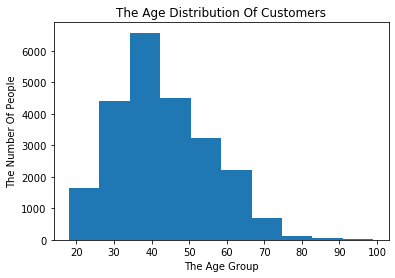

In [3]:
#What is the age distribution of customers?
data_age=df['Age']
plt.hist(data_age)
plt.title("The Age Distribution Of Customers")
plt.xlabel('The Age Group')
plt.ylabel('The Number Of People')
plt.show()

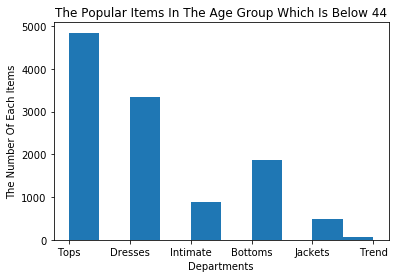

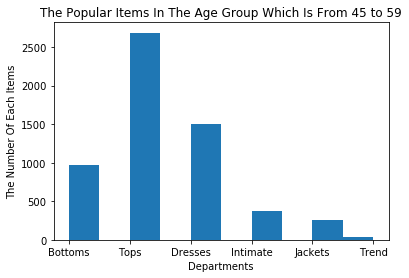

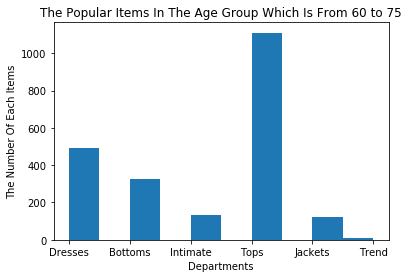

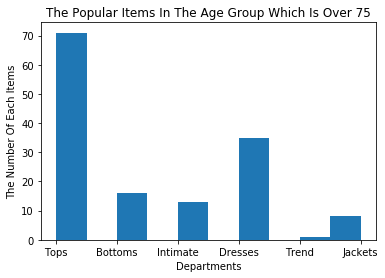

In [35]:
#What is the most popular item in each age group?

# NaN dropped:
dq2=df.dropna(how='any')

#from the UN World Health Organization we have a new age range:
#young people under 44 years old
d_young=dq2.loc[(dq2['Age']<=44),'Department']

plt.hist(d_young)
plt.title("The Popular Items In The Age Group Which Is Below 44")

plt.xlabel('Departments')
plt.ylabel('The Number Of Each Items')
plt.show()

#middle-aged people between 45 and 59 years old
d_middle=dq2.loc[(dq2['Age']>=45)&(dq2['Age']<=59),'Department']

plt.hist(d_middle)
plt.title("The Popular Items In The Age Group Which Is From 45 to 59")
plt.xlabel('Departments')
plt.ylabel('The Number Of Each Items')
plt.show()

#old people between 60 and 75 years old
d_old=dq2.loc[(dq2['Age']>=60)&(dq2['Age']<=75),'Department']

plt.hist(d_old)
plt.title("The Popular Items In The Age Group Which Is From 60 to 75")
plt.xlabel('Departments')
plt.ylabel('The Number of Each Items')
plt.show()

#and long-lived people over 75 years old.
d_long=dq2.loc[(dq2['Age']>=76),'Department']

plt.hist(d_long)
plt.title("The Popular Items In The Age Group Which Is Over 75")
plt.xlabel('Departments')
plt.ylabel('The Number Of Each Items')
plt.show()


In [4]:
#Using the measure of negativity or positivity that you define, rate the reviews. 
d_measure=df[['Title','Review Text']]
#clean d_measure ,such as change upper words into lower words and so on.
import string
d_measure['Title']= d_measure['Title'].str.lower()
d_measure['Review Text']= d_measure['Review Text'].str.lower()
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
d_measure['Title']= d_measure['Title'].str.replace(r'[^\w\s]+','')
d_measure['Review Text']= d_measure['Review Text'].str.replace(r'[^\w\s]+','')

d_measure['Review Text']

#open negative-words.txt and positive-words.txt
with open('positive-words.txt', 'r') as f:  
    positive_words= f.readlines()
with open('negative-words.txt', 'r') as g:
    negative_words = g.readlines()
positive_words1 = positive_words.copy()
negative_words1 = negative_words.copy()
# only have words for evaluation positive_words1/negative_words1

for i in range (35):
    positive_words1.remove(positive_words[i])
    negative_words1.remove(negative_words[i])
# delete blanks at the right of words
for i in range (len(positive_words1)):
    positive_words1[i] = positive_words1[i].rstrip()
for i in range (len(negative_words1)):
    negative_words1[i] = negative_words1[i].rstrip()
x=d_measure['Review Text'].tolist()

# the number of positive words
def count_pos(x):
    """Calculate the positive words in a string and return the number of positive words.
    The x must be a string,or it will be wrong.
    >>>x=2
    count_pos(x)
    AttributeError: 'int' object has no attribute 'split'
    >>>x='happy thank sad bad diffcult excellent'
    count_pos(x)
    Output:3     
    """ 
    pos_num = 0
    for i in x.split()  :
        if i in positive_words1 :
            pos_num += 1 
    return pos_num

# the number of negative words
def count_neg(x):
    """Same as the function count_pos(x) above"""
    neg_num = 0
    for i in x.split()  :
        if i in negative_words1 :
            neg_num += 1 
    return neg_num


r=[]
v=d_measure.shape[0]
for i in range(v):
    if type(x[i])==str:
        n=count_pos(x[i])-count_neg(x[i])
        r.append(n)
    else:
        r.append(0)
d_measure = pd.DataFrame(columns=['rate'],data=r)
d_measure.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

,rate
0,3
1,4
2,1
3,5
4,5


In [5]:
#What is the average rating in positive, negative or neutral reviews?
df['rate']=d_measure
#the average rating in positive reviews
d_positive=df.loc[(df['rate']>=3),'Rating']
positiver=d_positive.mean()
print('the average rating in positive reviews is')
print(positiver)

#the average rating in negative reviews
d_negative=df.loc[(df['rate']<=-2),'Rating']
negativer=d_negative.mean()
print('the average rating in negative reviews is')
print(negativer)

#the average rating in neutral reviews
d_neutral=df.loc[(df['rate']<=2)&(df['rate']>=-1),'Rating']
neutralr=d_neutral.mean()
print('the average rating in neutral reviews is')
print(neutralr)


the average rating in positive reviews is
4.453414372542009
the average rating in negative reviews is
2.788065843621399
the average rating in neutral reviews is
3.872656683305602


In [6]:
#Is the rating correlated to your measure of negativity-positivity
#the rating correlated to the positive rate
a=(df['rate']>=3).corr(df['Rating'])
print('the  correlation between the rating and the positive rate is')
print(round(a,2))
#the rating correlated to the negative rate
b=(df['rate']<=-2).corr(df['Rating'])
print('the  correlation between the rating and the negative rate is')
print(round(b,2))
#the rating correlated to the neutral rate
c=((df['rate']<=2)&(df['rate']>=-1)).corr(df['Rating'])
print('the  correlation between the rating and the neutral rate is')
print(round(c,2))


the  correlation between the rating and the positive rate is
0.28
the  correlation between the rating and the negative rate is
-0.18
the  correlation between the rating and the neutral rate is
-0.23


In [8]:
#Are there many outliers who wrote a negative text but left a high rating (or vice versa)?
d_neghighrate=df.loc[(df['rate']<=-2)&(df['Rating']==5),'Review Text']
print('These are outliers who wrote a negative text but left a high rating. Here are some examples of these people\'s review text:')
d_neghighrate.head(5)

These are outliers who wrote a negative text but left a high rating. Here are some examples of these people's review text:


338     When i received this blouse, ai noticed that t...
751     Can be a bit itchy sometimes, i guess dependin...
845                Unusual color. expensive even on sale.
1264    I purchased this in 2 colors. the black which ...
1479    Love this design it puts a twist on a turtle n...
Name: Review Text, dtype: object

In [9]:
#Which product attracted the most positive reviews?
d_positiveproduct=df.loc[(df['rate']>=3),'Product ID']
a = d_positiveproduct.value_counts()
print(a.head(5))
print('From above we can find product attracted the most positive reviews is the Product ID 1078, and there are amlost 594 people likeit')


1078    594
862     543
1094    442
1081    364
872     351
Name: Product ID, dtype: int64
From above we can find product attracted the most positive reviews is the Product ID 1078, and there are amlost 594 people likeit


In [10]:
#What is the most recommended product? What is the least recommended product?
#Using the measure of negativity or positivity that you define, rate the reviews. 
d_measure=df[['Department','Rating']]
#calculate the average rate of Tops
d_measure1=d_measure[d_measure['Department']=='Tops']
a1=d_measure1.shape[0]
b1=sum(d_measure1['Rating'])
c1=b1/a1
#calculate the average rate of Dresses
d_measure2=d_measure[d_measure['Department']=='Dresses']
a2=d_measure2.shape[0]
b2=sum(d_measure2['Rating'])
c2=b2/a2
#calculate the average rate of Intimate
d_measure3=d_measure[d_measure['Department']=='Intimate']
a3=d_measure3.shape[0]
b3=sum(d_measure3['Rating'])
c3=b3/a3
#calculate the average rate of Bottoms
d_measure4=d_measure[d_measure['Department']=='Bottoms']
a4=d_measure4.shape[0]
b4=sum(d_measure4['Rating'])
c4=b4/a4
#calculate the average rate of Jackets
d_measure5=d_measure[d_measure['Department']=='Jackets']
a5=d_measure5.shape[0]
b5=sum(d_measure5['Rating'])
c5=b5/a5
#calculate the average rate of Trend
d_measure6=d_measure[d_measure['Department']=='Trend']
a6=d_measure6.shape[0]
b6=sum(d_measure6['Rating'])
c6=b6/a6
if c1==max(c1,c2,c3,c4,c5,c6):
    print('Tops is the most recommended product')
if c2==max(c1,c2,c3,c4,c5,c6):
    print('Dresses is the most recommended product')
if c3==max(c1,c2,c3,c4,c5,c6):
    print('Intimate is the most recommended product')
if c4==max(c1,c2,c3,c4,c5,c6):
    print('Bottoms is the most recommended product')
if c5==max(c1,c2,c3,c4,c5,c6):
    print('Jackets is the most recommended product')
if c6==max(c1,c2,c3,c4,c5,c6):
    print('Trend is the least recommended product')
if c1==min(c1,c2,c3,c4,c5,c6):
    print('Tops is the least recommended product')
if c2==min(c1,c2,c3,c4,c5,c6):
    print('Dresses is the least recommended product')
if c3==min(c1,c2,c3,c4,c5,c6):
    print('Intimate is the least recommended product')
if c4==min(c1,c2,c3,c4,c5,c6):
    print('Bottoms is the least recommended product')
if c5==min(c1,c2,c3,c4,c5,c6):
    print('Jackets is the least recommended product')
if c6==min(c1,c2,c3,c4,c5,c6):
    print('Trend is the least recommended product')

Bottoms is the most recommended product
Trend is the least recommended product


In [11]:
#Which group of reviewers wrote a longer text in their review?
#Using the measure of negativity or positivity that you define, rate the reviews. 
d_measure=df[['Rating','Review Text']]
#clean d_measure ,such as change upper words into lower words and so on.
import string
d_measure['Review Text']= d_measure['Review Text'].str.lower()
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
d_measure['Review Text']= d_measure['Review Text'].str.replace(r'[^\w\s]+','')

dq2=d_measure.dropna(how='any')

#from the UN World Health Organization we have a new age range:
#young people under 44 years old
d_unhappy=dq2.loc[(dq2['Rating']<=3),'Review Text']
d_satisfied=dq2.loc[(dq2['Rating']>3),'Review Text']
#calculate the average words of two groups
a=len(d_unhappy)
b=len(d_satisfied)
x=d_unhappy.tolist()
y=d_satisfied.tolist()
k=0
l=0
for i in range(a):
    k=k+len(x[i].split())
for j in range(b):
    l=l+len(y[i].split())
average_unhappy=k/a
average_satisfied=l/b
if average_unhappy>average_satisfied:
    print('unhappy customers write longer reviews')
else:
    print('satisfied customers write longer reviews')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


unhappy customers write longer reviews


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [16]:
#Which age group uses more positive words? Which age group uses more negative words?
#Using the measure of negativity or positivity that you define, rate the reviews. 
d_measure=df[['Age','Review Text']]
#clean d_measure ,such as change upper words into lower words and so on.
import string
d_measure['Review Text']= d_measure['Review Text'].str.lower()
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
d_measure['Review Text']= d_measure['Review Text'].str.replace(r'[^\w\s]+','')

dq2=d_measure.dropna(how='any')

#young people under 44 years old
d_young=dq2.loc[(dq2['Age']<=44),'Review Text']
#middle-aged people between 45 and 59 years old
d_middle=dq2.loc[(dq2['Age']>=45)&(dq2['Age']<=59),'Review Text']
#old people between 60 and 75 years old
d_old=dq2.loc[(dq2['Age']>=60)&(dq2['Age']<=75),'Review Text']
#and long-lived people over 75 years old.
d_long=dq2.loc[(dq2['Age']>=76),'Review Text']

#calculate the average positive words of four groups
a=len(d_young)
b=len(d_middle)
c=len(d_old)
d=len(d_long)
x=d_young.tolist()
y=d_middle.tolist()
z=d_old.tolist()
r=d_long.tolist()
k1=0
l1=0
p1=0
q1=0
k2=0
l2=0
p2=0
q2=0
for i in range(a):
    if type(x[i])==str:
        k1=k1+count_pos(x[i])
    else:
        k1=k1
for i in range(b):
    if type(y[i])==str:
        l1=l1+count_pos(y[i])
    else:
        l1=l1
for i in range(c):
    if type(z[i])==str:
        p1=p1+count_pos(z[i])
    else:
        p1=p1
for i in range(d):
    if type(r[i])==str:
        q1=q1+count_pos(r[i])
    else:
        q1=q1

average_young1=k1/a
average_middle1=l1/b
average_old1=p1/c
average_long1=q1/d
if average_young1==max(average_young1,average_middle1,average_old1,average_long1):
    print('young people write most positive words')
elif average_middle1==max(average_young1,average_middle1,average_old1,average_long1):
    print('middle-aged people write most positive words')
elif average_old1==max(average_young1,average_middle1,average_old1,average_long1):
    print('old people write most positive words')
elif average_long1==max(average_young1,average_middle1,average_old1,average_long1):
    print('long old people write most positive words')

#calculate the average negative words of four groups
for i in range(a):
    if type(x[i])==str:
        k2=k2+count_neg(x[i])
    else:
        k2=k2
for i in range(b):
    if type(y[i])==str:
        l2=l2+count_neg(y[i])
    else:
        l2=l2
for i in range(c):
    if type(z[i])==str:
        p2=p2+count_neg(z[i])
    else:
        p2=p2
for i in range(d):
    if type(r[i])==str:
        q2=q2+count_neg(r[i])
    else:
        q2=q2

average_young2=k2/a
average_middle2=l2/b
average_old2=p2/c
average_long2=q2/d
if average_young2==max(average_young2,average_middle2,average_old2,average_long2):
    print('young people write most negative words')
elif average_middle2==max(average_young2,average_middle2,average_old2,average_long2):
    print('middle-aged people write most negative words')
elif average_old2==max(average_young2,average_middle2,average_old2,average_long2):
    print('old people write most negative words')
elif average_long2==max(average_young2,average_middle2,average_old2,average_long2):
    print('long old people write most negative words')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


long old people write most positive words
old people write most negative words


In [13]:
#Are older people more inclined to recommend a product or younger people?
d_young11=df.loc[(df['Age']<=49),'Is it Recommended?']
x=d_young11.value_counts()
d_old11=df.loc[(df['Age']>=50),'Is it Recommended?']
y=d_old11.value_counts()

#the percentage of young people who make recommend
a=x[1]/len(d_young11)
print('the percentage of young people who make recommend is')
print(round(a,2))

#the percentage of old people who make recommend
b=y[1]/len(d_old11)
print('the percentage of old people who make recommend is')
print(round(b,2))

#compare the percentage of young people and old people who make recommends
if a>b:
    print('younger people more inclined to recommend a product')
else:
    print('older people more inclined to recommend a product')

the percentage of young people who make recommend is
0.81
the percentage of old people who make recommend is
0.84
older people more inclined to recommend a product


In [14]:
#Is it true that unhappy customers use more capital letters? or it is the other way around?
#Using the measure of negativity or positivity that you define, rate the reviews. 
d_measure=df[['Rating','Review Text']]
#clean d_measure ,such as change upper words into lower words and so on.
import string
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
d_measure['Review Text']= d_measure['Review Text'].str.replace(r'[^\w\s]+','')

dq2=d_measure.dropna(how='any')


d_unhappy=dq2.loc[(dq2['Rating']<=3),'Review Text']
d_satisfied=dq2.loc[(dq2['Rating']>3),'Review Text']
#calculate the average number of bigchar of two groups
a=len(d_unhappy)
b=len(d_satisfied)
x=d_unhappy.tolist()
y=d_satisfied.tolist()
import re
bigchar_unhappy=0
for i in range(len(x)):
    bigchar_unhappy=bigchar_unhappy+len(re.findall(r'[A-Z]',x[i]))
bigchar_unhappy=bigchar_unhappy/a
bigchar_satisfied=0
for i in range(len(y)):
    bigchar_satisfied=bigchar_satisfied+len(re.findall(r'[A-Z]',y[i]))
bigchar_satisfied=bigchar_satisfied/b
if bigchar_unhappy>bigchar_satisfied:
    print('unhappy customers use more capital letters')
else:
    print('satisfied customers use more capital letters')

satisfied customers use more capital letters


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Task 2 - Analysing transportation data

In this task, you should analysing the cycling trips in Edinburgh in September 2019 collected in `cyclingtrips_Sep2019.csv`. This dataset is kindly supplied for use by Edinburgh Cycle Hire under the [Open Government License (OGL) v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/). You can extend your analysis to other months by downloading data from [this link](https://edinburghcyclehire.com/open-data/historical). 

As a part of this task you should visualise some aspects of the data geographically on a map. There are several different libraries and packages that you can use for this purpose. Below, I walk you through the installation and the basic usage of **folium**, but you are welcome to use any other geographical visualisation tools like `googlemaps` and `gmplot`. You can also find more about the folium library [here](https://python-visualization.github.io/folium/) and implement more advanced features of it in your project.

First, you need to install the library before importing it. The following cell does it for you in `Noteable` or a regular `Jupyter Notebook`:
 

In [1]:
import sys
!{sys.executable} -m pip install folium

Once you installed folium, you should import it and give it a starting coordinate

In [2]:
import folium

m = folium.Map(
    location=[55.924550, -3.176920],
    zoom_start=15
)

In the cell above, I gave the latitude and longitude of Murchison House as the starting location to folium. I also set the initial zoom to 15. You can change this coordinate as well as the zooming and observe the results. To display the map in a Jupyter notebook, you just need to ask for the object representation (simply typing `"m"` for the above map):

In [3]:
m

I can mark the Murchison House on the map by a circle with `radius=50`

In [4]:
folium.CircleMarker(
    location=[55.924550, -3.176920],
    radius=50,
    color='blue',
    fill=True,
    fill_color='blue'
).add_to(m)

m

Using this tool, we want to visualise how busy the stations are as destinations or starting points of cycling trips. After dividing the cycling trips into morning and afternoon/evening trips, show how many of them end in or start from a particular station. You can do this by drawing a radius proportional to the number of trips. You can also separate the stations as destinations or starting points by drawing them on different maps or by colour-coding them.

Just like the first task, this is an open-ended problem. You can address the following or any other interesting questions about bike trips:

- What was the average journey time and distance of bike trips on weekdays? What about weekends?
- What was the most common time(s) of day for journeys to be undertaken?
- Which areas do you suggest for building the new stations based on your analysis?
- Can you visualise which stations were used mostly for shorter trips and which one for longer trips?
- Can you compare the statistics of different months in summer? Is there any remarkable difference between them?

There is more open data available for other cities - here is the link for the data on the similar bike hire scheme in London ([TFL open data](https://cycling.data.tfl.gov.uk)), and for New York [here](https://www.citibikenyc.com/system-data). You could also think about some of the issues involved in other cities and bike share schemes, and perform similar sorts of analyses or comparisons. For example:

- Do bike hire schemes share popular times of day?
- Can you trace the common commute patterns of different cities? Are there any commonalities of shape or structure to the patterns?
- How does the average rental time compare across different cities? How does that time change as the size of the city changes?